In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


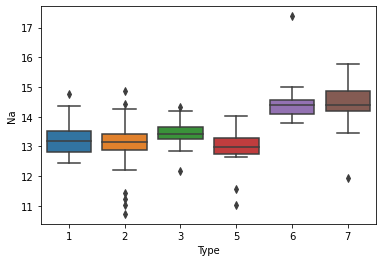

In [7]:
sns.boxplot(x = data.Type,y=data.Na)

In [8]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [0]:
x = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values

In [17]:
x[0:6]


array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00],
       [1.51596e+00, 1.27900e+01, 3.61000e+00, 1.62000e+00, 7.29700e+01,
        6.40000e-01, 8.07000e+00, 0.00000e+00, 2.60000e-01]])

In [0]:
y = data['Type'].values

In [19]:
y[0:5]

array([1, 1, 1, 1, 1])

In [20]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[ 0.87286765,  0.28495326,  1.25463857, -0.69244192, -1.12708201,
        -0.67170546, -0.14576634, -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, -0.17046023,  0.10231907,
        -0.02621325, -0.79373376, -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249,  0.19091171,  0.43878673,
        -0.16453301, -0.82894938, -0.35287683, -0.5864509 ],
       [-0.23283051, -0.24285268,  0.69870999, -0.31099376, -0.0529737 ,
         0.11210651, -0.51905192, -0.35287683, -0.5864509 ],
       [-0.31204471, -0.16920534,  0.65006624, -0.41137486,  0.55525631,
         0.08136879, -0.62469878, -0.35287683, -0.5864509 ]])

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(171, 9) (171,)
(43, 9) (43,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier


k = 4

knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [0]:
y_pred = knn.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,knn.predict(x_train)))
print(accuracy_score(y_pred,y_test))

0.7719298245614035
0.6046511627906976


In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for i in range(1,Ks):
  knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  mean_acc[i-1] = accuracy_score(y_pred,y_test)
print(mean_acc)

[0.6744186  0.58139535 0.62790698 0.60465116 0.60465116 0.58139535
 0.58139535 0.62790698 0.62790698]


Text(0.5, 1.0, 'Accuracy vs k plot')

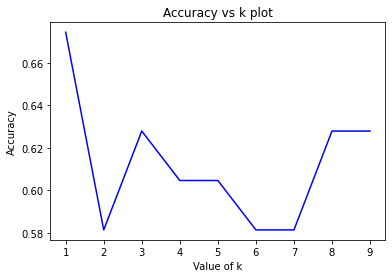

In [30]:
plt.plot(range(1,Ks),mean_acc,"b")
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k plot")

In [33]:
print("The maximum accuracy was",mean_acc.max(),"was with k =",mean_acc.argmax()+1)

The maximum accuracy was 0.6744186046511628 was with k = 1
